In [10]:
#Notebook to visualize final datasets
%matplotlib notebook
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
#import pandas_profiling  #!pip install pandas-profiling
from scipy.stats import linregress
from sklearn import datasets

In [11]:
# Reading final datasets

#Leagues datasets
all_xG = pd.read_csv('cleandata/all_xG.csv')
nodup_xG = pd.read_csv('cleandata/nodup_xG.csv')

#FIFA dataset
attackers = pd.read_csv('cleandata/attackers.csv')

In [12]:
# adding last name column to all_xG and nodup_xG datasets
#I used the same Patrick's method in the notebook "Attacker_Data_Cleaned"

lname_all_xG = []
for name in all_xG['player_name']:
    lname_all_xG.append(name.split(" ")[-1])
    
all_xG.insert(loc=3, column='Last_Name', value=lname_all_xG)


lname_nodup_xG = []
for name in nodup_xG['player_name']:
    lname_nodup_xG.append(name.split(" ")[-1])
    
nodup_xG.insert(loc=3, column='Last_Name', value=lname_nodup_xG)


In [13]:
#renaming column for further merging
attackers = attackers.rename(columns = {"Club_2017": "team_title_17"}) 

In [14]:
#merge all data by last name
data_all = pd.merge(all_xG, attackers, on=['Last_Name','team_title_17'], how ='outer')
data_nodup = pd.merge(nodup_xG, attackers, on=['Last_Name','team_title_17'], how ='outer')

In [15]:
#data_nodup.profile_report(style={'full_width':True})

In [65]:
data_nodup = data_nodup.dropna()
data_nodup['Short_Pass_2017'][0:100]

1       76.0
3       79.0
5       81.0
7       84.0
8       70.0
10      65.0
17      83.0
20      64.0
33      78.0
36      83.0
40      69.0
45      74.0
51      71.0
54      69.0
57      50.0
59      89.0
63      62.0
64      73.0
106     67.0
139     59.0
177     77.0
188     72.0
219     74.0
225     45.0
278     66.0
299     65.0
396     71.0
438     62.0
512     86.0
513     80.0
        ... 
1362    70.0
1507    83.0
1508    63.0
1510    80.0
1511    68.0
1513    68.0
1514    70.0
1516    74.0
1518    73.0
1520    81.0
1521    78.0
1527    75.0
1533    72.0
1555    83.0
1557    74.0
1559    82.0
1564    53.0
1572    74.0
1584    68.0
1603    75.0
1605    75.0
1648    69.0
1652    67.0
1675    65.0
1704    73.0
1716    81.0
1751    48.0
1785    58.0
1834    52.0
1943    76.0
Name: Short_Pass_2017, Length: 81, dtype: float64

In [66]:
data_nodup.columns

Index(['Unnamed: 0', 'id', 'player_name', 'Last_Name', 'games_18', 'time_18',
       'goals_18', 'xG_18', 'assists_18', 'xA_18', 'shots_18', 'key_passes_18',
       'team_title_18', 'npg_18', 'npxG_18', 'league_18', 'games_17',
       'time_17', 'goals_17', 'xG_17', 'assists_17', 'xA_17', 'shots_17',
       'key_passes_17', 'team_title_17', 'npg_17', 'npxG_17', 'league_17',
       'games_16', 'time_16', 'goals_16', 'xG_16', 'assists_16', 'xA_16',
       'shots_16', 'key_passes_16', 'team_title_16', 'npg_16', 'npxG_16',
       'league_16', 'Name_x', 'Birth_Date', 'Rating_2017', 'Positioning_2017',
       'Finishing_2017', 'Shot_Power_2017', 'Long_Shots_2017', 'Volleys_2017',
       'Penalties_2017', 'Vision_2017', 'Crossing_2017', 'FKAccuracy_2017',
       'Short_Pass_2017', 'Long_Pass_2017', 'Curve_2017', 'name', 'ID',
       'Club_2018', 'Overall_2018', 'Positioning_2018', 'Finishing_2018',
       'Shot_Power_2018', 'Long_Shots_2018', 'Volleys_2018', 'Penalties_2018',
       'Volleys_

In [67]:
# Correlation between xA and short pass,long pass, vision, crossing

xA_16 = (data_nodup['xA_16'][0:80]/data_nodup['time_16'][0:80])*90
xA_17 = (data_nodup['xA_17'][0:80]/data_nodup['time_17'][0:80])*90
xA_18 = (data_nodup['xA_18'][0:80]/data_nodup['time_18'][0:80])*90


a_16 = data_nodup['assists_16'][0:80]/90
a_17 = data_nodup['assists_17'][0:80]/90
a_18 = data_nodup['assists_18'][0:80]/90


sp_17 = data_nodup['Short_Pass_2017'][0:80]
sp_18 = data_nodup['Short_Pass_2018'][0:80]
sp_19 = data_nodup['Short_Pass_2019'][0:80]


lp_17 = data_nodup['Long_Pass_2017'][0:80]
lp_18 = data_nodup['Long_Pass_2018'][0:80]
lp_19 = data_nodup['Long_Pass_2019'][0:80]


vis_17 = data_nodup['Vision_2017'][0:80]
vis_18 = data_nodup['Vision_2018'][0:80]
vis_19 = data_nodup['Vision_2019'][0:80]


cr_17 = data_nodup['Crossing_2017'][0:80]
cr_18 = data_nodup['Crossing_2018'][0:80]
cr_19 = data_nodup['Crossing_2019'][0:80]

<IPython.core.display.Javascript object>


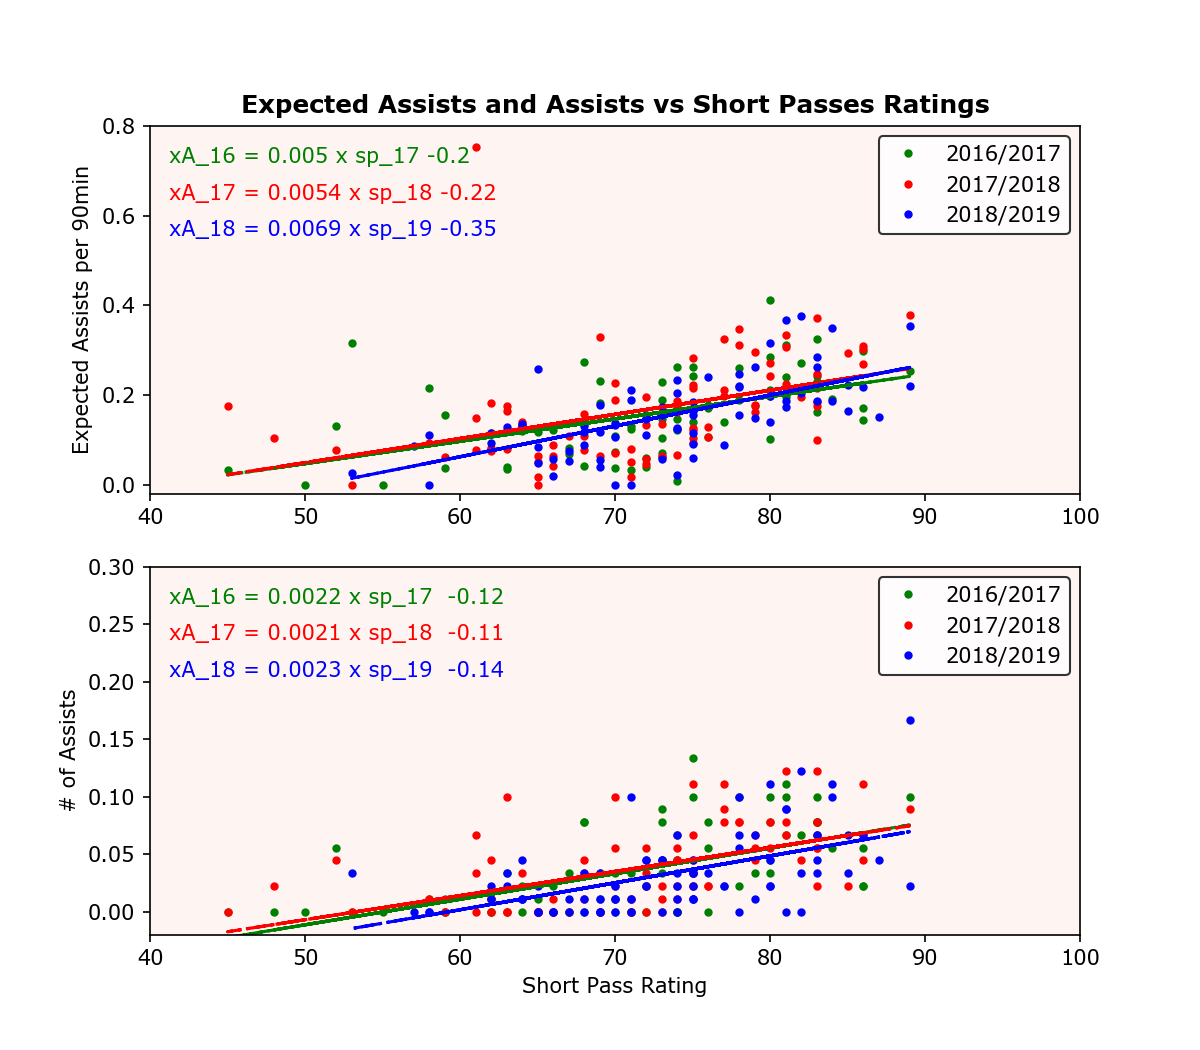

In [91]:
# xA and assists vs short pass

fig, ax = plt.subplots(2,1, figsize=(8, 7))

# ----------- Suplot 1

ax[0].plot(sp_17, xA_16, 'g.')
ax[0].plot(sp_18, xA_17, 'r.')
ax[0].plot(sp_19, xA_18, 'b.')

#Linear regression sp_17/xA_16
mask01 = ~np.isnan(sp_17) & ~np.isnan(xA_16)

(m01_slope, m01_int, m01_r, m01_p, m01_std_err) = linregress(sp_17[mask01], xA_16[mask01])
m01_fit = (m01_slope * sp_17) + m01_int
ax[0].plot(sp_17, m01_fit,"g-.")


#Linear regression sp_18/xA_17
mask02 = ~np.isnan(sp_18) & ~np.isnan(xA_17)
(m02_slope, m02_int, m02_r, m02_p, m02_std_err) = linregress(sp_18[mask02], xA_17[mask02])
m02_fit = (m02_slope * sp_18) + m02_int
ax[0].plot(sp_18, m02_fit,"r-.")


#Linear regression sp_19/xA_18
mask03 = ~np.isnan(sp_19) & ~np.isnan(xA_18)
(m03_slope, m03_int, m03_r, m02_p, m03_std_err) = linregress(sp_19[mask03],xA_18[mask03])
m03_fit = (m03_slope * sp_19) + m03_int
ax[0].plot(sp_19, m03_fit,"b-.")


eq_01 = "xA_16 = " + str(round(m01_slope,4)) + " x sp_17 " + str(round(m01_int,2))
eq_02 = "xA_17 = " + str(round(m02_slope,4)) + " x sp_18 " + str(round(m02_int,2))
eq_03 = "xA_18 = " + str(round(m03_slope,4)) + " x sp_19 " + str(round(m03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)


# ----------- Suplot 2 

ax[1].plot(sp_17, a_16, 'g.')
ax[1].plot(sp_18, a_17, 'r.')
ax[1].plot(sp_19, a_18, 'b.')


#Linear regression sp_17/a_16
(m11_slope, m11_int, m11_r, m11_p, m11_std_err) = linregress(sp_17, a_16)
m11_fit = (m11_slope * sp_17) + m11_int
ax[1].plot(sp_17,m11_fit,"g-.")

#Linear regression sp_18/a_17
(m12_slope, m12_int, m12_r, m12_p, m12_std_err) = linregress(sp_18,a_17)
m12_fit = (m12_slope * sp_18) + m12_int
ax[1].plot(sp_18, m12_fit,"r-.")

#Linear regression sp_19/a_18
(m13_slope, m13_int, m13_r, m13_p, m13_std_err) = linregress(sp_19,a_18)
m13_fit = (m13_slope * sp_19) + m13_int
ax[1].plot(sp_19, m13_fit,"b-.")


eq_11 = "xA_16 = " + str(round(m11_slope,4)) + " x sp_17  " + str(round(m11_int,2))
eq_12 = "xA_17 = " + str(round(m12_slope,4)) + " x sp_18  " + str(round(m12_int,2))
eq_13 = "xA_18 = " + str(round(m13_slope,4)) + " x sp_19  " + str(round(m13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)



# ---------------------------
ax[0].set_ylabel('Expected Assists per 90min')

ax[0].set_ylim(-0.02, 0.8)
ax[0].set_xlim(40, 100)

ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)



ax[1].set_xlabel('Short Pass Rating')
ax[1].set_ylabel('# of Assists')

ax[1].set_ylim(-0.02, 0.3)
ax[1].set_xlim(40, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)


ax[0].patch.set_facecolor('salmon')
ax[0].patch.set_alpha(0.08)

ax[1].patch.set_facecolor('salmon')
ax[1].patch.set_alpha(0.08)

ax[0].set_title('Expected Assists and Assists vs Short Passes Ratings', fontweight ='bold')
plt.show()
plt.savefig('images/shortpass.png')


In [ ]:
(m01_slope, m11_int, m11_r, m11_p, m11_std_err)

<IPython.core.display.Javascript object>


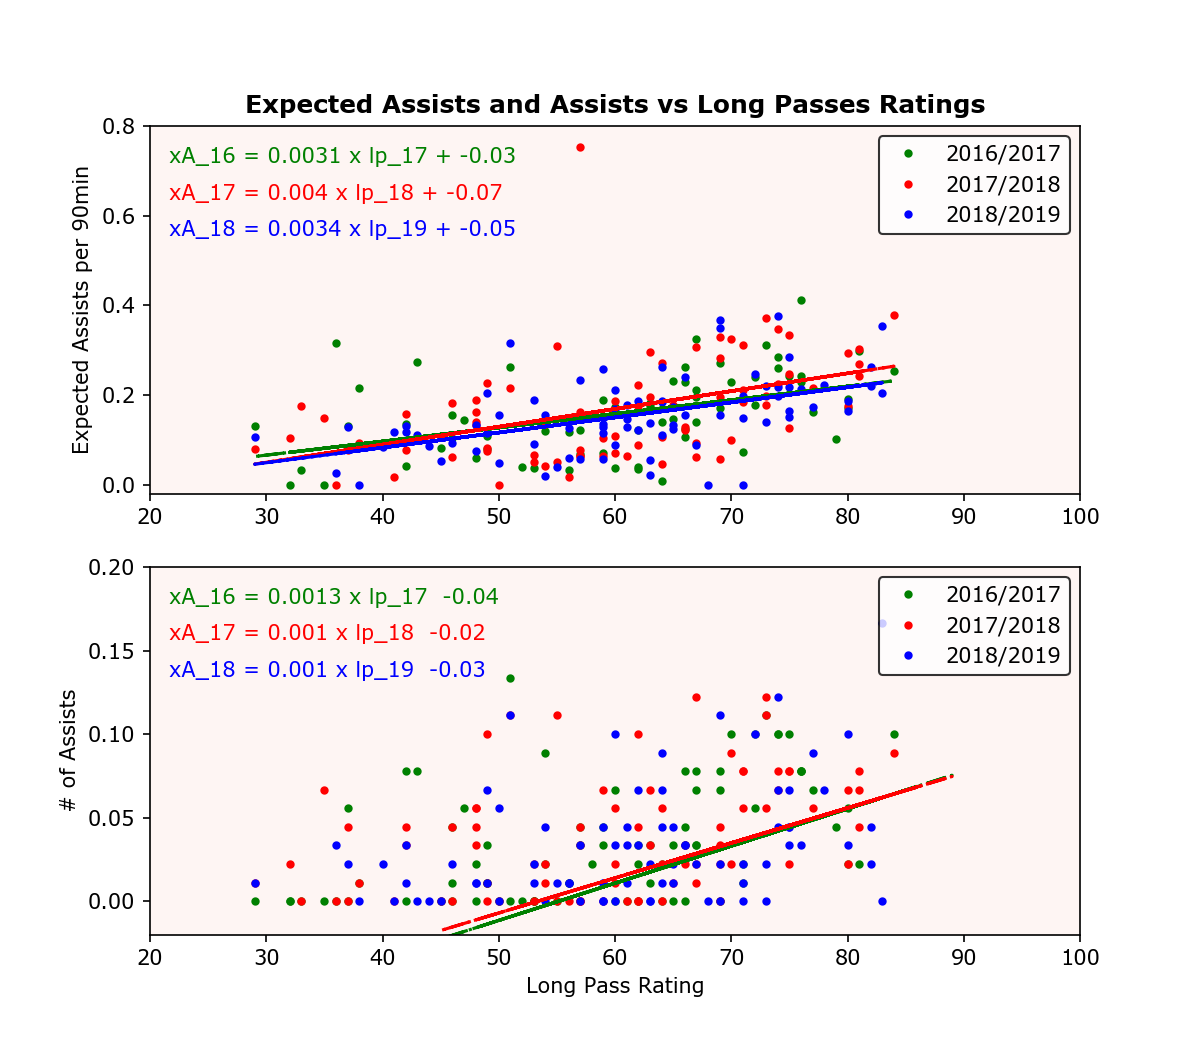

In [92]:
# xA and assists vs long pass

fig, ax = plt.subplots(2,1,figsize=(8, 7))

# ------------- Suplot 1

ax[0].plot(lp_17, xA_16, 'g.')
ax[0].plot(lp_18, xA_17, 'r.')
ax[0].plot(lp_19, xA_18, 'b.')


#Linear regression lp_17/xA_16
mask01 = ~np.isnan(lp_17) & ~np.isnan(xA_16)
(n01_slope, n01_int, n01_r, n01_p, n01_std_err) = linregress(lp_17[mask01], xA_16[mask01])
n01_fit = (n01_slope * lp_17) + n01_int
ax[0].plot(lp_17, n01_fit,"g-.")


#Linear regression lp_18/xA_17
mask02 = ~np.isnan(lp_18) & ~np.isnan(xA_17)
(n02_slope, n02_int, n02_r, n02_p, n02_std_err) = linregress(lp_18[mask02], xA_17[mask02])
n02_fit = (n02_slope * lp_18) + n02_int
ax[0].plot(lp_18, n02_fit,"r-.")


#Linear regression lp_19/xA_18
mask03 = ~np.isnan(lp_19) & ~np.isnan(xA_18)
(n03_slope, n03_int, n03_r, n02_p, n03_std_err) = linregress(lp_19[mask03],xA_18[mask03])
n03_fit = (n03_slope * lp_19) + n03_int
ax[0].plot(lp_19, n03_fit,"b-.")


eq_01 = "xA_16 = " + str(round(n01_slope,4)) + " x lp_17 + " + str(round(n01_int,2))
eq_02 = "xA_17 = " + str(round(n02_slope,4)) + " x lp_18 + " + str(round(n02_int,2))
eq_03 = "xA_18 = " + str(round(n03_slope,4)) + " x lp_19 + " + str(round(n03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)


#----------------- Subplot 2

ax[1].plot(lp_17, a_16, 'g.')
ax[1].plot(lp_18, a_17, 'r.')
ax[1].plot(lp_19, a_18, 'b.')

#Linear regression lp_17/a_16
mask11 = ~np.isnan(lp_17) & ~np.isnan(a_16)
(n11_slope, n11_int, n11_r, n11_p, n11_std_err) = linregress(lp_17[mask11], a_16[mask11])
n11_fit = (n11_slope * lp_17) + n11_int
ax[1].plot(sp_17,m11_fit,"g-.")

#Linear regression lp_18/a_17
mask12 = ~np.isnan(lp_18) & ~np.isnan(a_17)
(n12_slope, n12_int, n12_r, n12_p, n12_std_err) = linregress(lp_18[mask12],a_17[mask12])
n12_fit = (n12_slope * lp_18) + n12_int
ax[1].plot(sp_18, m12_fit,"r-.")

#Linear regression lp_19/a_18
mask13 = ~np.isnan(lp_19) & ~np.isnan(a_18)
(n13_slope, n13_int, n13_r, n13_p, n13_std_err) = linregress(lp_19[mask13],a_18[mask13])
n13_fit = (n13_slope * sp_19) + n13_int
#ax[1].plot(lp_19, n13_fit,"b-.", zorder=2)


eq_11 = "xA_16 = " + str(round(n11_slope,4)) + " x lp_17  " + str(round(n11_int,2))
eq_12 = "xA_17 = " + str(round(n12_slope,4)) + " x lp_18  " + str(round(n12_int,2))
eq_13 = "xA_18 = " + str(round(n13_slope,4)) + " x lp_19  " + str(round(n13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)


# -----------------------------

ax[0].set_ylabel('Expected Assists per 90min')
ax[0].set_ylim(-0.02, 0.8)
ax[0].set_xlim(20, 100)
ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)


ax[1].set_xlabel('Long Pass Rating')
ax[1].set_ylabel('# of Assists')
ax[1].set_ylim(-0.02, 0.2)
ax[1].set_xlim(20, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)


ax[0].patch.set_facecolor('salmon')
ax[0].patch.set_alpha(0.08)

ax[1].patch.set_facecolor('salmon')
ax[1].patch.set_alpha(0.08)

ax[0].set_title('Expected Assists and Assists vs Long Passes Ratings', fontweight ='bold')
plt.show()
plt.savefig('images/longpass.png')



<IPython.core.display.Javascript object>


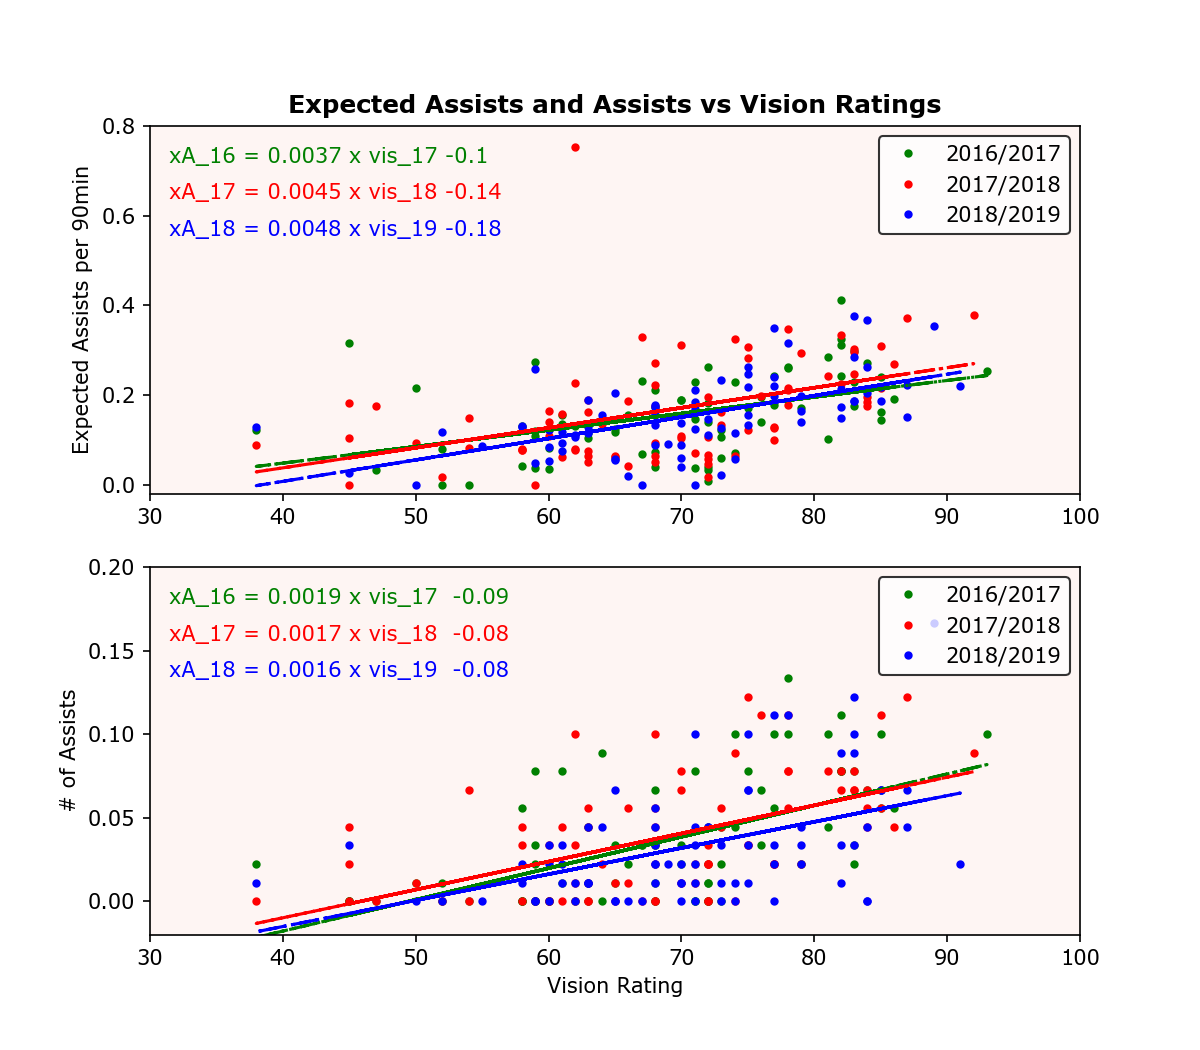

In [93]:
# xA and assists vs vision

fig, ax = plt.subplots(2,1, figsize=(8, 7))

# --- Suplot 1

ax[0].plot(vis_17, xA_16, 'g.')
ax[0].plot(vis_18, xA_17, 'r.')
ax[0].plot(vis_19, xA_18, 'b.')

#Linear regression vis_17/xA_16
mask01 = ~np.isnan(vis_17) & ~np.isnan(xA_16)
(p01_slope, p01_int, p01_r, p01_p, p01_std_err) = linregress(vis_17[mask01], xA_16[mask01])
p01_fit = (p01_slope * vis_17) + p01_int
ax[0].plot(vis_17, p01_fit,"g-.")


#Linear regression vis_18/xA_17
mask02 = ~np.isnan(vis_18) & ~np.isnan(xA_17)
(p02_slope, p02_int, p02_r, p02_p, p02_std_err) = linregress(vis_18[mask02], xA_17[mask02])
p02_fit = (p02_slope * vis_18) + p02_int
ax[0].plot(vis_18, p02_fit,"r-.")


#Linear regression vis_19/xA_18
mask03 = ~np.isnan(vis_19) & ~np.isnan(xA_18)
(p03_slope, p03_int, p03_r, p02_p, p03_std_err) = linregress(vis_19[mask03],xA_18[mask03])
p03_fit = (p03_slope * vis_19) + p03_int
ax[0].plot(vis_19, p03_fit,"b-.")


eq_01 = "xA_16 = " + str(round(p01_slope,4)) + " x vis_17 " + str(round(p01_int,2))
eq_02 = "xA_17 = " + str(round(p02_slope,4)) + " x vis_18 " + str(round(p02_int,2))
eq_03 = "xA_18 = " + str(round(p03_slope,4)) + " x vis_19 " + str(round(p03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)




# ------- Subplot 2

ax[1].plot(vis_17, a_16, 'g.')
ax[1].plot(vis_18, a_17, 'r.')
ax[1].plot(vis_19, a_18, 'b.')


#Linear regression sp_17/a_16
(p11_slope, p11_int, p11_r, p11_p, p11_std_err) = linregress(vis_17, a_16)
p11_fit = (p11_slope * vis_17) + p11_int
ax[1].plot(vis_17,p11_fit,"g-.")

#Linear regression sp_18/a_17
(p12_slope, p12_int, p12_r, p12_p, p12_std_err) = linregress(vis_18,a_17)
p12_fit = (p12_slope * vis_18) + p12_int
ax[1].plot(vis_18, p12_fit,"r-.")

#Linear regression sp_19/a_18
(p13_slope, p13_int, p13_r, p13_p, p13_std_err) = linregress(vis_19,a_18)
p13_fit = (p13_slope * vis_19) + p13_int
ax[1].plot(vis_19, p13_fit,"b-.")


eq_11 = "xA_16 = " + str(round(p11_slope,4)) + " x vis_17  " + str(round(p11_int,2))
eq_12 = "xA_17 = " + str(round(p12_slope,4)) + " x vis_18  " + str(round(p12_int,2))
eq_13 = "xA_18 = " + str(round(p13_slope,4)) + " x vis_19  " + str(round(p13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)

# ------------------------

ax[0].set_ylabel('Expected Assists per 90min')
ax[0].set_ylim(-0.02, 0.8)
ax[0].set_xlim(30, 100)

ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k',frameon = True, 
             loc='upper right',ncol=1)


ax[1].set_xlabel('Vision Rating')
ax[1].set_ylabel('# of Assists')
ax[1].set_ylim(-0.02, 0.2)
ax[1].set_xlim(30, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)



ax[0].patch.set_facecolor('salmon')
ax[0].patch.set_alpha(0.08)

ax[1].patch.set_facecolor('salmon')
ax[1].patch.set_alpha(0.08)

ax[0].set_title('Expected Assists and Assists vs Vision Ratings', fontweight ='bold')
plt.show()
plt.savefig('images/vision.png')



<IPython.core.display.Javascript object>


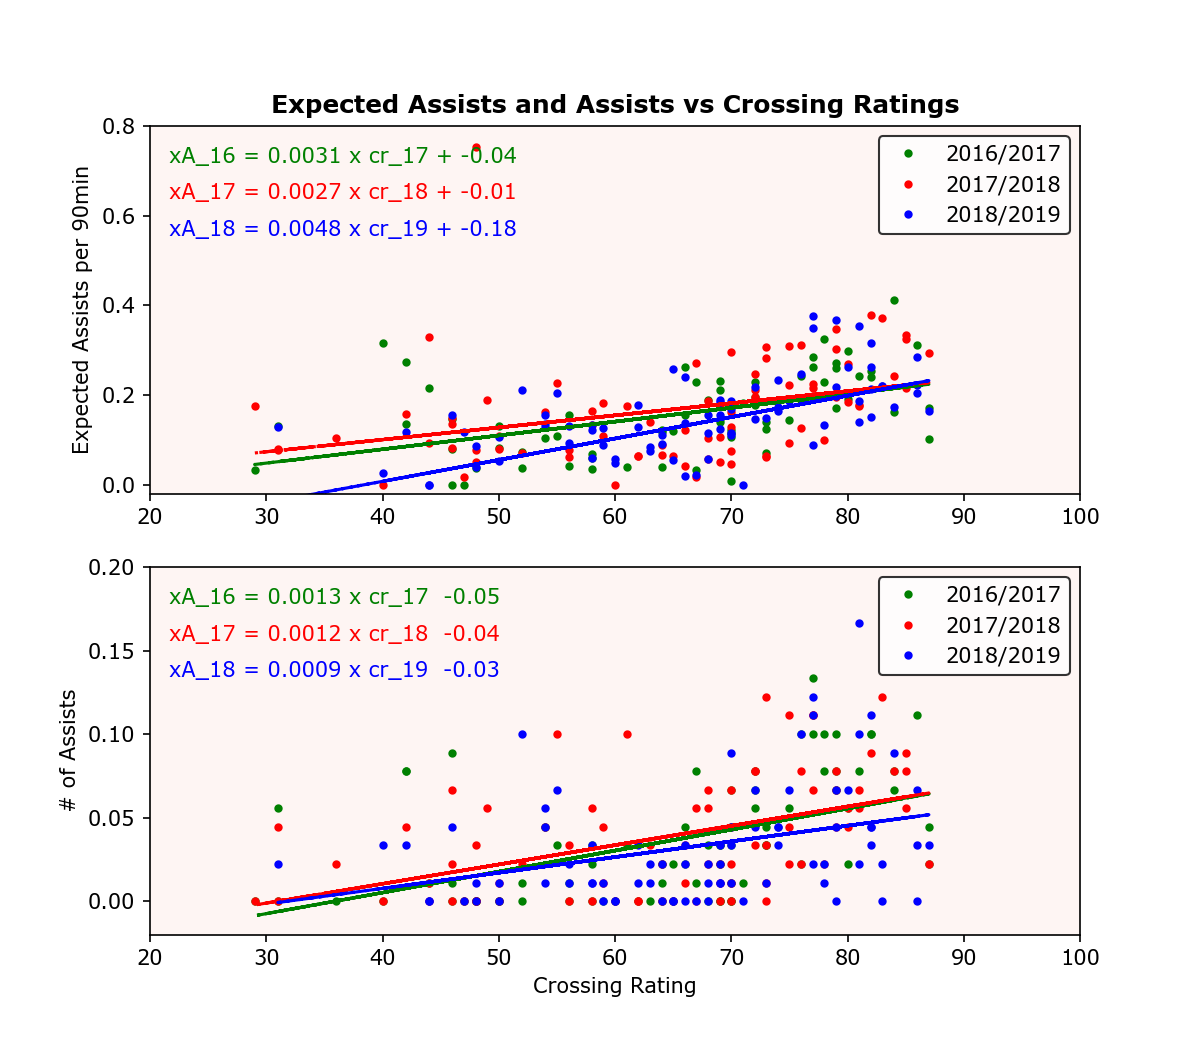

In [94]:
# xA and assists vs crossing

fig, ax = plt.subplots(2,1, figsize=(8, 7))

# --------- Subplot 1

ax[0].plot(cr_17, xA_16, 'g.')
ax[0].plot(cr_18, xA_17, 'r.')
ax[0].plot(cr_19, xA_18, 'b.')

#Linear regression cr_17/xA_16
mask01 = ~np.isnan(cr_17) & ~np.isnan(xA_16)
(w01_slope, w01_int, w01_r, w01_p, w01_std_err) = linregress(cr_17[mask01], xA_16[mask01])
w01_fit = (w01_slope * cr_17) + w01_int
ax[0].plot(cr_17, w01_fit,"g-.")


#Linear regression lp_18/xA_17
(w02_slope, w02_int, w02_r, w02_p, w02_std_err) = linregress(cr_18, xA_17)
w02_fit = (w02_slope * cr_18) + w02_int
ax[0].plot(cr_18, w02_fit,"r-.")


#Linear regression lp_19/xA_18
(w03_slope, w03_int, w03_r, w02_p, w03_std_err) = linregress(vis_19,xA_18)
w03_fit = (w03_slope * cr_19) + w03_int
ax[0].plot(cr_19, w03_fit,"b-.")


eq_01 = "xA_16 = " + str(round(w01_slope,4)) + " x cr_17 + " + str(round(w01_int,2))
eq_02 = "xA_17 = " + str(round(w02_slope,4)) + " x cr_18 + " + str(round(w02_int,2))
eq_03 = "xA_18 = " + str(round(w03_slope,4)) + " x cr_19 + " + str(round(w03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)


# ------- Subplot 2

ax[1].plot(cr_17, a_16, 'g.')
ax[1].plot(cr_18, a_17, 'r.')
ax[1].plot(cr_19, a_18, 'b.')


#Linear regression cr_17/a_16
(w11_slope, w11_int, w11_r, w11_p, w11_std_err) = linregress(cr_17, a_16)
w11_fit = (w11_slope * cr_17) + w11_int
ax[1].plot(cr_17,w11_fit,"g-.")

#Linear regression sp_18/a_17
(w12_slope, w12_int, w12_r, w12_p, w12_std_err) = linregress(cr_18,a_17)
w12_fit = (w12_slope * cr_18) + w12_int
ax[1].plot(cr_18, w12_fit,"r-.")

#Linear regression sp_19/a_18
(w13_slope, w13_int, w13_r, w13_p, w13_std_err) = linregress(cr_19,a_18)
w13_fit = (w13_slope * cr_19) + w13_int
ax[1].plot(cr_19, w13_fit,"b-.")


eq_11 = "xA_16 = " + str(round(w11_slope,4)) + " x cr_17  " + str(round(w11_int,2))
eq_12 = "xA_17 = " + str(round(w12_slope,4)) + " x cr_18  " + str(round(w12_int,2))
eq_13 = "xA_18 = " + str(round(w13_slope,4)) + " x cr_19  " + str(round(w13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)

# ------------------------------------------------------------------------------
ax[0].set_ylabel('Expected Assists per 90min')
ax[0].set_ylim(-0.02, 0.8)
ax[0].set_xlim(20, 100)
ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k',frameon = True, 
             loc='upper right',ncol=1)


ax[1].set_xlabel('Crossing Rating')
ax[1].set_ylabel('# of Assists')
ax[1].set_ylim(-0.02, 0.2)
ax[1].set_xlim(20, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)


ax[0].patch.set_facecolor('salmon')
ax[0].patch.set_alpha(0.08)

ax[1].patch.set_facecolor('salmon')
ax[1].patch.set_alpha(0.08)


ax[0].set_title('Expected Assists and Assists vs Crossing Ratings', fontweight ='bold')
plt.show()
plt.savefig('images/crossing.png')



In [27]:
#Comparison of xG data to shooting relevant stats
xG_16 = (data_nodup['xG_16'][0:80]/data_nodup['time_16'][0:80])*90
xG_17 = (data_nodup['xG_17'][0:80]/data_nodup['time_17'][0:80])*90
xG_18 = (data_nodup['xG_18'][0:80]/data_nodup['time_18'][0:80])*90


g_16 = data_nodup['goals_16'][0:80]/90
g_17 = data_nodup['goals_17'][0:80]/90
g_18 = data_nodup['goals_18'][0:80]/90


pos_17 = data_nodup['Positioning_2017'][0:80]
pos_18 = data_nodup['Positioning_2018'][0:80]
pos_19 = data_nodup['Positioning_2019'][0:80]


fin_17 = data_nodup['Finishing_2017'][0:80]
fin_18 = data_nodup['Finishing_2018'][0:80]
fin_19 = data_nodup['Finishing_2019'][0:80]


<IPython.core.display.Javascript object>


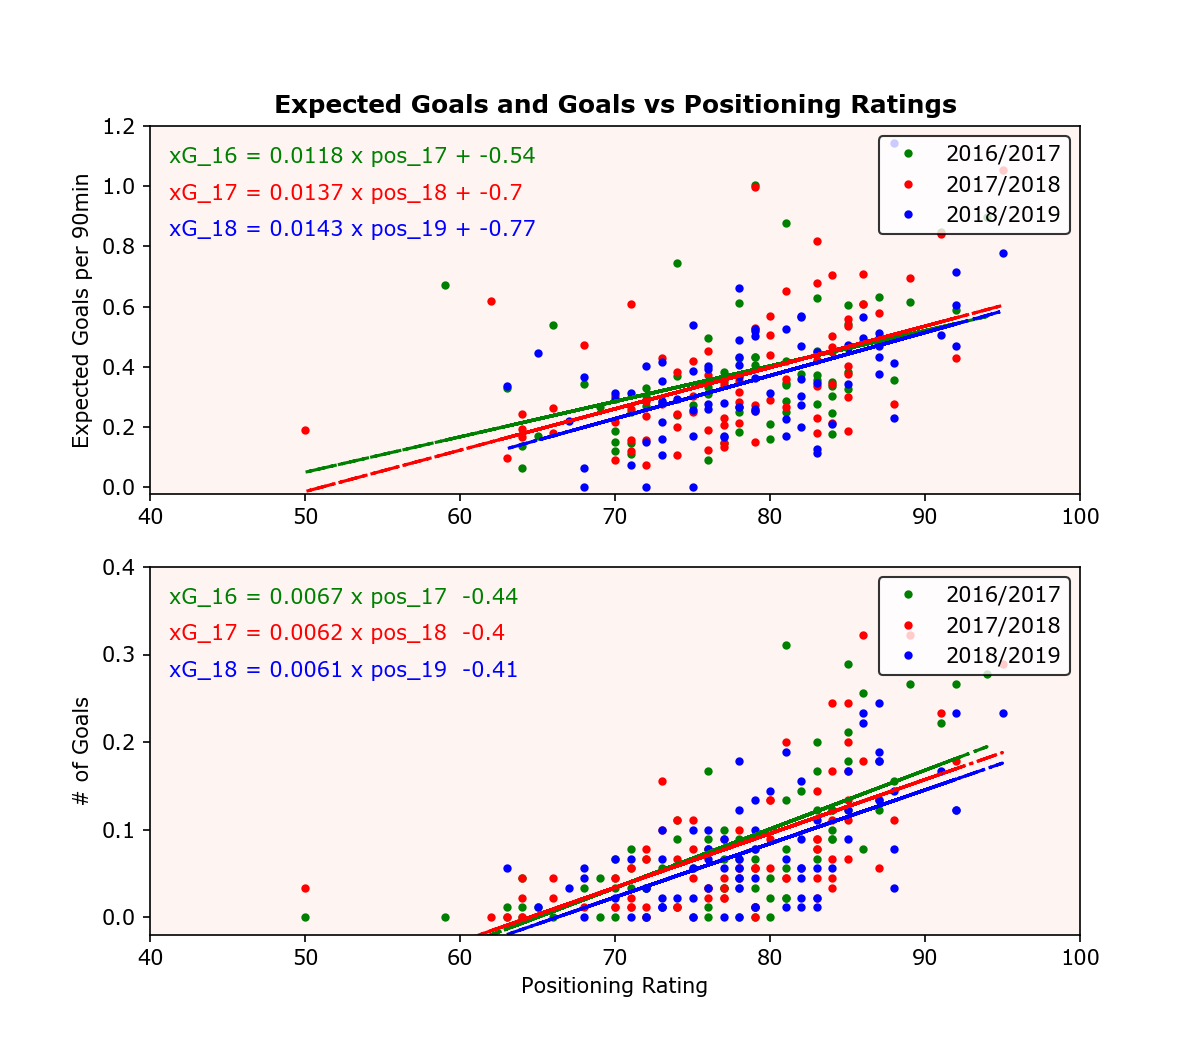

In [95]:
#positioning vs xG vs goals

fig, ax = plt.subplots(2,1, figsize=(8, 7))

# --------- Subplot 1

ax[0].plot(pos_17, xG_16, 'g.')
ax[0].plot(pos_18, xG_17, 'r.')
ax[0].plot(pos_19, xG_18, 'b.')


#Linear regression pos_17/xG_16
mask01 = ~np.isnan(pos_17) & ~np.isnan(xG_16)
(q01_slope, q01_int, q01_r, q01_p, q01_std_err) = linregress(pos_17[mask01], xG_16[mask01])
q01_fit = (q01_slope * pos_17) + q01_int
ax[0].plot(pos_17, q01_fit,"g-.")


#Linear regression pos_18/xG_17
(q02_slope, q02_int, q02_r, q02_p, q02_std_err) = linregress(pos_18, xG_17)
q02_fit = (q02_slope * pos_18) + q02_int
ax[0].plot(pos_18, q02_fit,"r-.")


#Linear regression pos_19/xG_18
(q03_slope, q03_int, q03_r, q02_p, q03_std_err) = linregress(pos_19,xG_18)
q03_fit = (q03_slope * pos_19) + q03_int
ax[0].plot(pos_19, q03_fit,"b-.")

eq_01 = "xG_16 = " + str(round(q01_slope,4)) + " x pos_17 + " + str(round(q01_int,2))
eq_02 = "xG_17 = " + str(round(q02_slope,4)) + " x pos_18 + " + str(round(q02_int,2))
eq_03 = "xG_18 = " + str(round(q03_slope,4)) + " x pos_19 + " + str(round(q03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)

# ---------- Subplot 2

ax[1].plot(pos_17, g_16, 'g.')
ax[1].plot(pos_18, g_17, 'r.')
ax[1].plot(pos_19, g_18, 'b.')

#Linear regression pos_17/g_16
(q11_slope, q11_int, q11_r, q11_p, q11_std_err) = linregress(pos_17, g_16)
q11_fit = (q11_slope * pos_17) + q11_int
ax[1].plot(pos_17,q11_fit,"g-.")

#Linear regression pos_18/g_17
(q12_slope, q12_int, q12_r, q12_p, q12_std_err) = linregress(pos_18,g_17)
q12_fit = (q12_slope * pos_18) + q12_int
ax[1].plot(pos_18, q12_fit,"r-.")

#Linear regression pos_19/g_18
(q13_slope, q13_int, q13_r, q13_p, q13_std_err) = linregress(pos_19,g_18)
q13_fit = (q13_slope * pos_19) + q13_int
ax[1].plot(pos_19, q13_fit,"b-.")


eq_11 = "xG_16 = " + str(round(q11_slope,4)) + " x pos_17  " + str(round(q11_int,2))
eq_12 = "xG_17 = " + str(round(q12_slope,4)) + " x pos_18  " + str(round(q12_int,2))
eq_13 = "xG_18 = " + str(round(q13_slope,4)) + " x pos_19  " + str(round(q13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)

# ------------------------



ax[0].set_ylabel('Expected Goals per 90min')
ax[0].set_ylim(-0.02, 1.2)
ax[0].set_xlim(40, 100)
ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)



ax[1].set_xlabel('Positioning Rating')
ax[1].set_ylabel('# of Goals')

ax[1].set_ylim(-0.02, 0.4)
ax[1].set_xlim(40, 100)


ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)

ax[0].patch.set_facecolor('salmon')
ax[0].patch.set_alpha(0.08)

ax[1].patch.set_facecolor('salmon')
ax[1].patch.set_alpha(0.08)

ax[0].set_title('Expected Goals and Goals vs Positioning Ratings', fontweight ='bold')
plt.show()
plt.savefig('images/Positioning.png')



<IPython.core.display.Javascript object>


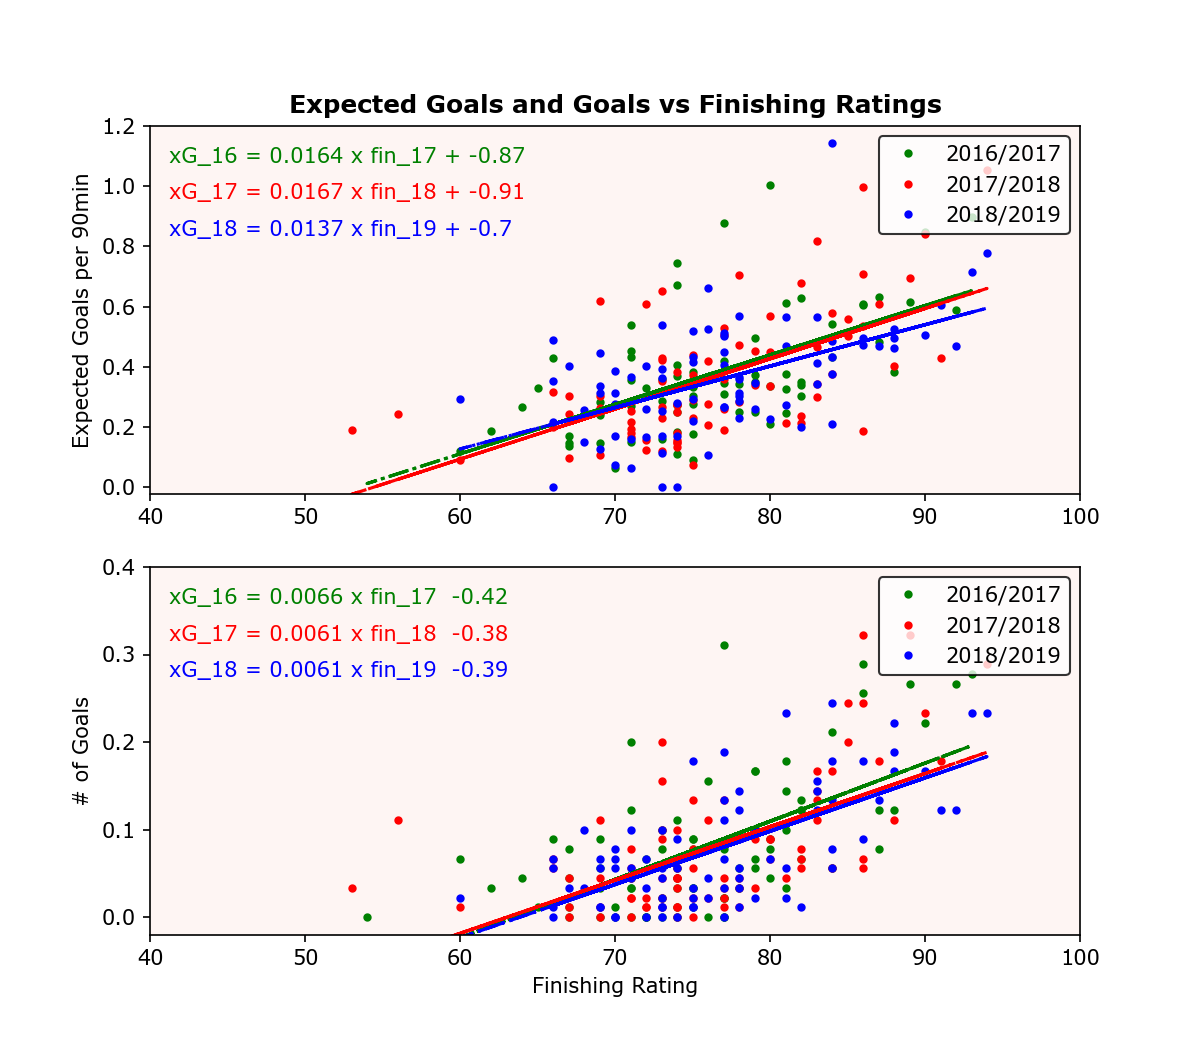

In [119]:
# Finishing vs xG vs goals

fig, ax = plt.subplots(2,1, figsize=(8, 7))

#-------------- Subplot 1
ax[0].plot(fin_17, xG_16, 'g.')
ax[0].plot(fin_18, xG_17, 'r.')
ax[0].plot(fin_19, xG_18, 'b.')


#Linear regression fin_17/xG_16
mask01 = ~np.isnan(fin_17) & ~np.isnan(xG_16)
(r01_slope, r01_int, r01_r, r01_p, r01_std_err) = linregress(fin_17[mask01], xG_16[mask01])
r01_fit = (r01_slope * fin_17) + r01_int
ax[0].plot(fin_17, r01_fit,"g-.")


#Linear regression fin_18/xG_17
(r02_slope, r02_int, r02_r, r02_p, r02_std_err) = linregress(fin_18, xG_17)
r02_fit = (r02_slope * fin_18) + r02_int
ax[0].plot(fin_18, r02_fit,"r-.")


#Linear regression fin_19/xG_18
(r03_slope, r03_int, r03_r, r02_p, r03_std_err) = linregress(fin_19,xG_18)
r03_fit = (r03_slope * fin_19) + r03_int
ax[0].plot(fin_19, r03_fit,"b-.")


eq_01 = "xG_16 = " + str(round(r01_slope,4)) + " x fin_17 + " + str(round(r01_int,2))
eq_02 = "xG_17 = " + str(round(r02_slope,4)) + " x fin_18 + " + str(round(r02_int,2))
eq_03 = "xG_18 = " + str(round(r03_slope,4)) + " x fin_19 + " + str(round(r03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)

# ----------- Subplot 2

ax[1].plot(fin_17, g_16, 'g.')
ax[1].plot(fin_18, g_17, 'r.')
ax[1].plot(fin_19, g_18, 'b.')


#Linear regression fin_17/g_16
(r11_slope, r11_int, r11_r, r11_p, r11_std_err) = linregress(fin_17, g_16)
r11_fit = (r11_slope * fin_17) + r11_int
ax[1].plot(fin_17,r11_fit,"g-.")

#Linear regression fin_18/g_17
(r12_slope, r12_int, r12_r, r12_p, r12_std_err) = linregress(fin_18,g_17)
r12_fit = (r12_slope * fin_18) + r12_int
ax[1].plot(fin_18, r12_fit,"r-.")

#Linear regression fin_19/g_18
(r13_slope, r13_int, r13_r, r13_p, r13_std_err) = linregress(fin_19,g_18)
r13_fit = (r13_slope * fin_19) + r13_int
ax[1].plot(fin_19, r13_fit,"b-.")


eq_11 = "xG_16 = " + str(round(r11_slope,4)) + " x fin_17  " + str(round(r11_int,2))
eq_12 = "xG_17 = " + str(round(r12_slope,4)) + " x fin_18  " + str(round(r12_int,2))
eq_13 = "xG_18 = " + str(round(r13_slope,4)) + " x fin_19  " + str(round(r13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)

# ------------------------------------------------------------



ax[0].set_ylabel('Expected Goals per 90min')
ax[0].set_ylim(-0.02, 1.2)
ax[0].set_xlim(40, 100)
ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)

ax[1].set_xlabel('Finishing Rating')
ax[1].set_ylabel('# of Goals')
ax[1].set_ylim(-0.02, 0.4)
ax[1].set_xlim(40, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', frameon = True, 
             loc='upper right',ncol=1)

ax[0].patch.set_facecolor('salmon')
ax[0].patch.set_alpha(0.08)

ax[1].patch.set_facecolor('salmon')
ax[1].patch.set_alpha(0.08)

ax[0].set_title('Expected Goals and Goals vs Finishing Ratings', fontweight ='bold')
plt.show()
plt.savefig('images/Finishing.png')


In [120]:
# R values:
seasons = ['16/17', '17/18', '18,19', '16/17', '17/18', '18,19']
# xA and assists vs short pass
A = [m01_r, m02_r, m03_r, m11_r, m12_r, m13_r]

# xA and assists vs long pass
B = [n01_r, n02_r, n03_r, n11_r, n12_r, n13_r]

# xA and assists vs vision
C = [p01_r, p02_r, p03_r, p11_r, p12_r, p13_r]

# xA and assists vs crossing
D = [w01_r, w02_r, w03_r, w11_r, w12_r, w13_r]

# xG and goals vs positioning
E = [q01_r, q02_r, q03_r, q11_r, q12_r, q13_r]

# xG and goals vs finishing
F = [r01_r, r02_r, r03_r, r11_r, r12_r, r13_r]

pd.DataFrame([A,B,C,D,E,F])


,0,1,2,3,4,5
0,0.514320,0.415987,0.646128,0.586520,0.541544,0.538849
1,0.459969,0.451831,0.501475,0.481499,0.386100,0.371581
2,0.452330,0.427586,0.581836,0.593300,0.537833,0.466266
3,0.474435,0.331406,0.581836,0.497594,0.472933,0.347242
4,0.425793,0.504836,0.523787,0.683262,0.626261,0.628422
5,0.576010,0.592840,0.531358,0.614610,0.597485,0.658464


<IPython.core.display.Javascript object>


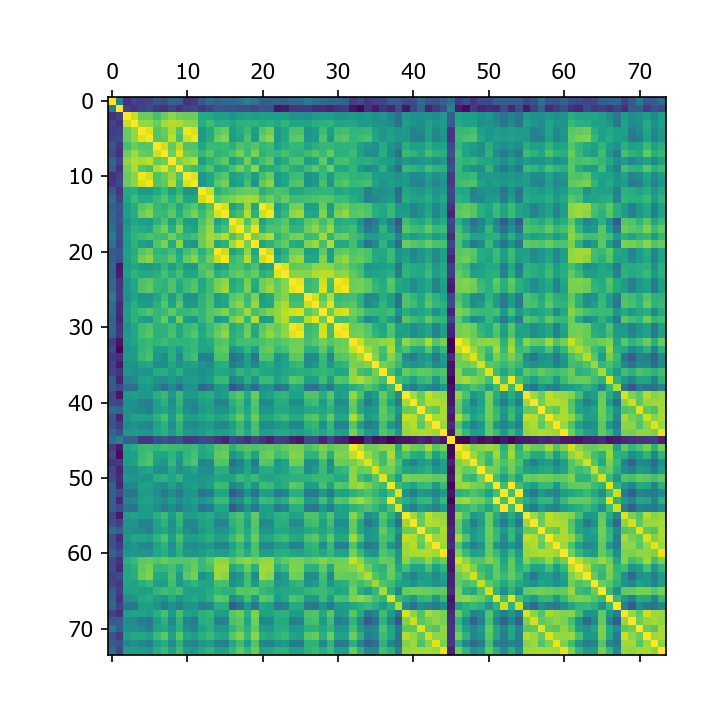

In [118]:
data_nodup.columns

In [ ]:
new_data = 

plt.matshow(data_nodup.corr())
#plt.xticks(range(len(data_nodup.columns[0:10])), data_nodup.columns[0:10])
#plt.yticks(range(len(data_nodup.columns[0:10]), data_nodup.columns[0:10])
#plt.colorbar()
plt.show()